In [25]:
import os
import re

from PIL import Image
import pandas as pd
import skimage as ski
import numpy as np

In [2]:
%pwd

'D:\\Pierre-Elliott\\Projets\\ksc\\training\\notebooks'

In [7]:
KS_IMAGES_PATH = "../../../ksc-data/images"  # By default, in a sibling directory to the current project (ie, <project>/training/notebooks)

In [37]:
images_list = os.listdir(os.path.join(*KS_IMAGES_PATH.split('/')))

In [38]:
df = pd.DataFrame(images_list, columns=["filename"])

In [39]:
df.head()

,filename
0,Ia_SEC_1.jpg
1,Ia_SEC_10.jpg
2,Ia_SEC_11.jpg
3,Ia_SEC_12.jpg
4,Ia_SEC_13.jpg


In [40]:
df['stone_class'] = list(map(lambda x: x.split('_')[0], df.filename.values))

In [42]:
df['class_level_1'] = list(map(lambda x: re.sub(r'[a-z0-9]', '', x), df.stone_class.values))

In [43]:
df['class_level_2'] = list(map(lambda x: re.sub(r'[A-Z]', '', x), df.stone_class.values))

In [108]:
df['SUR'] = list(map(lambda x: 'SUR' in x, df.filename.values))
df['SEC'] = list(map(lambda x: 'SEC' in x, df.filename.values))

In [105]:
df['filetype'] = list(map(lambda x: x.split(".")[1], df.filename.values))

In [109]:
df

,filename,stone_class,class_level_1,class_level_2,filetype,SUR,SEC
0,Ia_SEC_1.jpg,Ia,I,a,jpg,False,True
1,Ia_SEC_10.jpg,Ia,I,a,jpg,False,True
2,Ia_SEC_11.jpg,Ia,I,a,jpg,False,True
3,Ia_SEC_12.jpg,Ia,I,a,jpg,False,True
4,Ia_SEC_13.jpg,Ia,I,a,jpg,False,True
...,...,...,...,...,...,...,...
198,VIa_SEC_4.png,VIa,VI,a,png,False,True
199,VIa_SUR_1.png,VIa,VI,a,png,True,False
200,VIa_SUR_2.png,VIa,VI,a,png,True,False
201,VIa_SUR_3.png,VIa,VI,a,png,True,False


In [100]:
df.groupby('stone_class').count().filename

stone_class
IIIa     6
IIIb    32
IIa      4
IIb     28
IVa1     8
IVa2     3
IVb      8
IVc      8
IVd     10
Ia      54
Ib       8
Ic       2
Id       8
Ie       6
VIa      8
Va      10
Name: filename, dtype: int64

In [98]:
def annotate(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + rect.get_width() / 2, p.get_height()), ha='center', va='bottom')

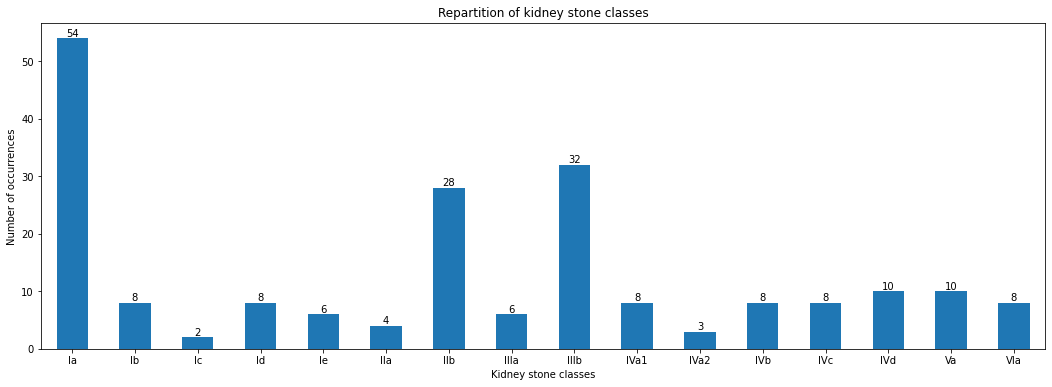

In [104]:
stone_classes_repartition = df.groupby('stone_class', sort=False).count().filename
ax = stone_classes_repartition.plot.bar(figsize=(18,6), rot=0)
ax.set_xlabel('Kidney stone classes')
ax.set_ylabel('Number of occurrences')
ax.set_title('Repartition of kidney stone classes')
annotate(ax)

In [110]:
df.to_csv(os.path.join(*'../dataset.csv'.split('/')), index=False)